In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
num_points = 2000
vectors_set = []

for i in xrange(num_points):
    if np.random.random() > 0.5:
        vectors_set.append([np.random.normal(0.0, 0.9),
                           np.random.normal(0.0, 0.9)])
    
    else:
        vectors_set.append([np.random.normal(3.0, 0.5),
                           np.random.normal(1.0, 0.5)])

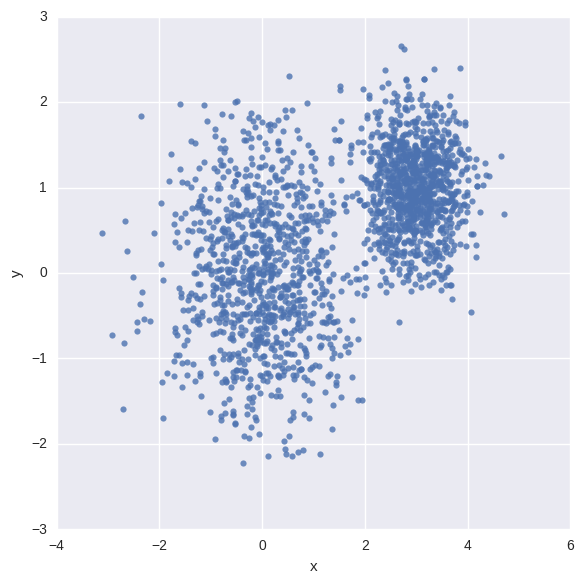

In [4]:
df = pd.DataFrame({"x": [v[0] for v in vectors_set],
                  "y": [v[1] for v in vectors_set]})
sns.lmplot('x', 'y', data=df, fit_reg = False, size = 6)
plt.show()

In [6]:
# k-means algorithm

vectors = tf.constant(vectors_set)   # 모든 데이터를 텐서로. 상수 텐서 제작
k = 4   
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0,0], [k, -1]))  # 무작위로 데이터를 섞고, 4개의 중심을 선택.

expanded_vectors = tf.expand_dims(vectors, 0)  # 차원을 늘려 뺄셈을 하기위해 차원확장
expanded_centroides = tf.expand_dims(centroides, 1) # 위와 동


# Squared Euclidean Distance를 구함. (tf.sub) 
assignments = tf.argmin(tf.reduce_sum(tf.square(tf.sub(expanded_vectors, expanded_centroides)), 2), 0)

means = tf.concat(0, [tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where(tf.equal(assignments, c)), [1, -1])),
                                    reduction_indices = [1]) for c in xrange(k)])

update_centroides = tf.assign(centroides, means)

init_op = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init_op)

for step in xrange(100):
    _, centroid_values, assignment_values = sess.run([update_centroides, centroides, assignments])


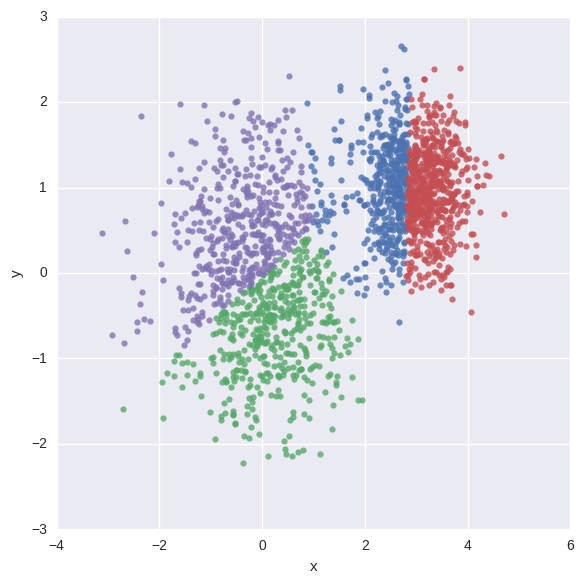

In [7]:
# plotting

data = {'x': [], 'y': [], 'cluster':[]}

for i in xrange(len(assignment_values)):
    data['x'].append(vectors_set[i][0])
    data['y'].append(vectors_set[i][1])
    data['cluster'].append(assignment_values[i])
    
df = pd.DataFrame(data)
sns.lmplot('x', 'y', data=df, fit_reg=False, size=6, hue='cluster', legend=False)

plt.show()